# **TRATAR LOS DATOS**

## *SUBIR LAS IMAGENES ENCONTRADAS*

In [165]:
#Crear las carpetas para subir las imagenes
!mkdir autos
!mkdir bicicletas
!mkdir camionetas
!mkdir motos

In [ ]:
#Entrar en cada carpeta y descomprimir el archivo zip
%cd autos
!unzip /content/autos.zip
%cd ..

%cd bicicletas
!unzip /content/bicicletas.zip
%cd ..

%cd camionetas
!unzip /content/camionetas.zip
%cd ..

%cd motos
!unzip /content/motos.zip
%cd ..

In [167]:
#Mostrar cuantas imagenes tengo de cada categoria
!ls /content/autos | wc -l #849
!ls /content/bicicletas | wc -l #628
!ls /content/camionetas | wc -l #720
!ls /content/motos | wc -l #786

849
628
720
786


In [168]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

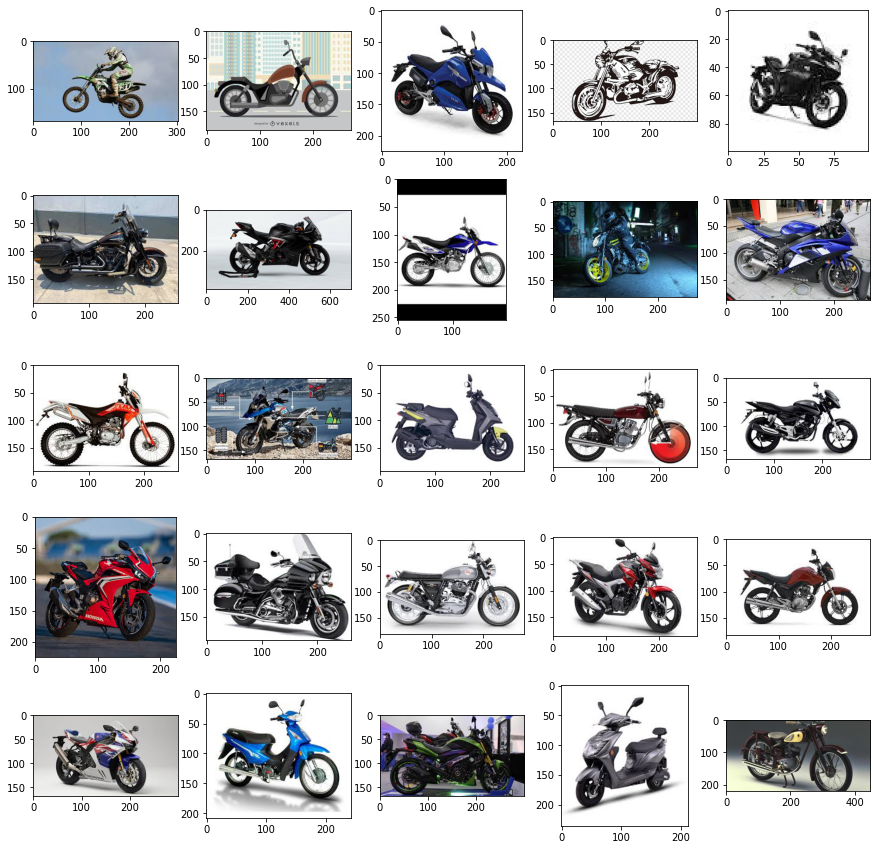

In [169]:
#Mostrar algunas imagenes con pyplot
plt.figure(figsize=(15,15))

carpeta = '/content/motos'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg, format="jpg")
  plt.imshow(imagen)

## *CREACIÓN DE LA CARPETA PARA EL DATASET*

In [170]:
#Crear carpetas para hacer el set de datos
!mkdir dataset
!mkdir dataset/autos
!mkdir dataset/bicicletas
!mkdir dataset/camionetas
!mkdir dataset/motos

In [171]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 245 (el num. menor de imagenes que subi)
import cv2
import shutil
import matplotlib.image as mpimg
carpeta_fuente = '/content/autos'
carpeta_destino = '/content/dataset/autos'

TAMANO_IMG = 100
imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 628:
    imagen = cv2.imread(carpeta_fuente + '/' + nombreimg, 1)
    imagen = cv2.resize(imagen, (TAMANO_IMG, TAMANO_IMG))
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1) #Cambiar tamano a 100,100,1
    cv2.imwrite(carpeta_destino + "/" + nombreimg, imagen)

In [172]:
import shutil
carpeta_fuente = '/content/bicicletas'
carpeta_destino = '/content/dataset/bicicletas'

TAMANO_IMG = 100
imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 628:
    imagen = mpimg.imread(carpeta_fuente + '/' + nombreimg, format="jpg")
    imagen = cv2.resize(imagen, (TAMANO_IMG, TAMANO_IMG))
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1) #Cambiar tamano a 100,100,1
    cv2.imwrite(carpeta_destino + "/" + nombreimg, imagen)

In [173]:
import shutil
carpeta_fuente = '/content/camionetas'
carpeta_destino = '/content/dataset/camionetas'

TAMANO_IMG = 100
imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 628:
    imagen = mpimg.imread(carpeta_fuente + '/' + nombreimg, format="jpg")
    imagen = cv2.resize(imagen, (TAMANO_IMG, TAMANO_IMG))
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1) #Cambiar tamano a 100,100,1
    cv2.imwrite(carpeta_destino + "/" + nombreimg, imagen)

In [174]:
import shutil
carpeta_fuente = '/content/motos'
carpeta_destino = '/content/dataset/motos'

TAMANO_IMG = 100
imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 628:
    imagen = cv2.imread(carpeta_fuente + '/' + nombreimg, 1)
    imagen = cv2.resize(imagen, (TAMANO_IMG, TAMANO_IMG))
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1) #Cambiar tamano a 100,100,1
    cv2.imwrite(carpeta_destino + "/" + nombreimg, imagen)

In [175]:
#Mostrar cuantas imagenes tengo de cada categoria en el dataset
!ls /content/dataset/autos | wc -l
!ls /content/dataset/bicicletas | wc -l
!ls /content/dataset/camionetas | wc -l
!ls /content/dataset/motos | wc -l

628
628
628
628


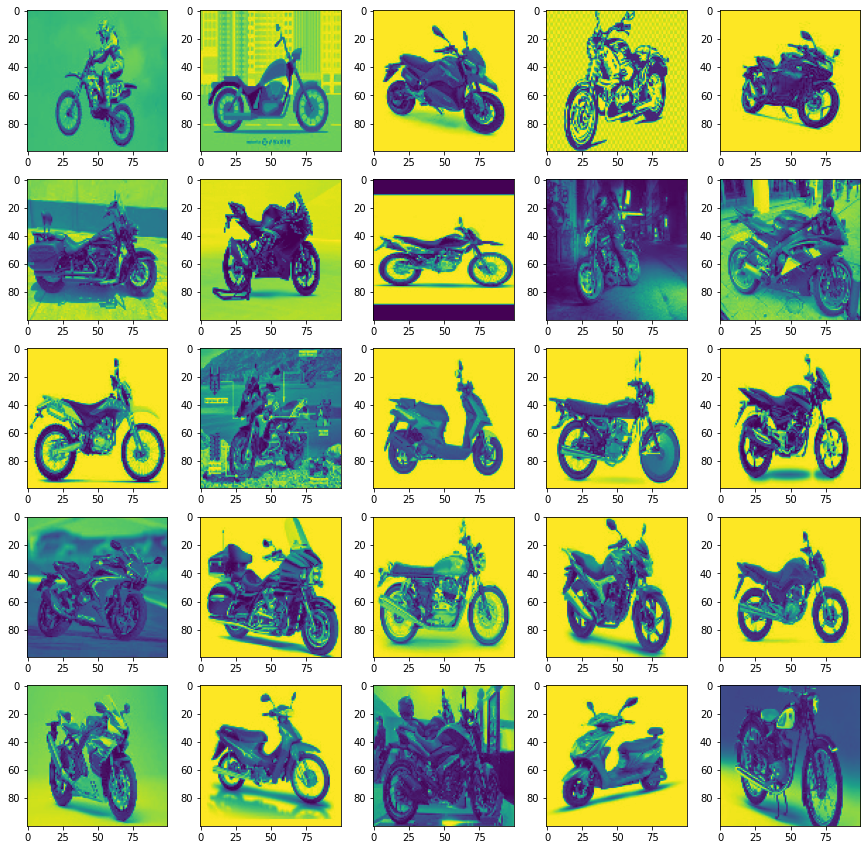

In [177]:
#Mostrar algunas imagenes con pyplot
plt.figure(figsize=(15,15))

carpeta = '/content/dataset/motos'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg, format="jpg")
  plt.imshow(imagen)

## *PROCESAMIENTO DE LOS DATOS Y CREACIÓN DEL DATASET*

In [178]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(100,100), color_mode='grayscale',
                                                     batch_size=1000, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(100,100), color_mode='grayscale',
                                                     batch_size=300, shuffle=True, subset='validation')

Found 2009 images belonging to 4 classes.
Found 500 images belonging to 4 classes.


# **CREAR EL MODELO**

## *DEFINIR EL MODELO*

In [179]:
import tensorflow as tf
import tensorflow_hub as hub

In [180]:
#primer prueba del modelo desde cero
integradoruno = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
  tf.keras.layers.Dense(500, activation='relu'),
  tf.keras.layers.Dense(500, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax')
])

In [184]:
#tercera prueba del modelo desde cero
integradortres = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax')
])

In [181]:
integradoruno.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 10000)             0         
                                                                 
 dense_45 (Dense)            (None, 500)               5000500   
                                                                 
 dense_46 (Dense)            (None, 500)               250500    
                                                                 
 dense_47 (Dense)            (None, 4)                 2004      
                                                                 
Total params: 5,253,004
Trainable params: 5,253,004
Non-trainable params: 0
_________________________________________________________________


In [185]:
integradortres.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 128)    

In [182]:
#Compilar
# adam = función optimizadora basada en AdaGrad y RMSprop
# categorical_crossentropy = función que calcula la pérdida de entropía cruzada entre las etiquetas y las predicciones.
# accuracy = calcula que tan seguido las predicciones son iguales a las etiquetas
integradoruno.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [186]:
#Compilar
# adam = función optimizadora basada en AdaGrad y RMSprop
# categorical_crossentropy = función que calcula la pérdida de entropía cruzada entre las etiquetas y las predicciones.
# accuracy = calcula que tan seguido las predicciones son iguales a las etiquetas
integradortres.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# **ENTRENAR EL MODELO**

## *HISTORIAL DE ENTRENAMIENTO*

In [183]:
#Entrenar el modelo
EPOCAS = 100

from tensorflow.keras.callbacks import TensorBoard
#La variable de tensorboard se envia en el arreglo de "callbacks" (hay otros tipos de callbacks soportados)
#En este caso guarda datos en la carpeta indicada en cada epoca, de manera que despues
#Tensorboard los lee para hacer graficas
tensorboardDenso = TensorBoard(log_dir='logs/denso')
historialuno = integradoruno.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas,
    callbacks=[tensorboardDenso]
)

Epoch 1/50
3/3 [==============================] - 5s 1s/step - loss: 11.7573 - accuracy: 0.2419 - val_loss: 24.6971 - val_accuracy: 0.2500
Epoch 2/50
3/3 [==============================] - 5s 2s/step - loss: 14.9052 - accuracy: 0.2499 - val_loss: 9.6696 - val_accuracy: 0.2500
Epoch 3/50
3/3 [==============================] - 5s 2s/step - loss: 6.1590 - accuracy: 0.2519 - val_loss: 2.6931 - val_accuracy: 0.2640
Epoch 4/50
3/3 [==============================] - 5s 1s/step - loss: 2.9633 - accuracy: 0.3021 - val_loss: 3.5891 - val_accuracy: 0.3120
Epoch 5/50
3/3 [==============================] - 4s 1s/step - loss: 3.2378 - accuracy: 0.2797 - val_loss: 2.2356 - val_accuracy: 0.2460
Epoch 6/50
3/3 [==============================] - 5s 1s/step - loss: 2.3311 - accuracy: 0.2544 - val_loss: 2.3451 - val_accuracy: 0.2460
Epoch 7/50
3/3 [==============================] - 4s 1s/step - loss: 2.1993 - accuracy: 0.2668 - val_loss: 1.7691 - val_accuracy: 0.2380
Epoch 8/50
3/3 [======================

In [187]:
#Entrenar el modelo
EPOCAS = 50

from tensorflow.keras.callbacks import TensorBoard
#La variable de tensorboard se envia en el arreglo de "callbacks" (hay otros tipos de callbacks soportados)
#En este caso guarda datos en la carpeta indicada en cada epoca, de manera que despues
#Tensorboard los lee para hacer graficas
tensorboardDenso = TensorBoard(log_dir='logs/denso')
historialtres = integradortres.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas,
    callbacks=[tensorboardDenso]
)

Epoch 1/50
3/3 [==============================] - 46s 23s/step - loss: 1.4775 - accuracy: 0.2688 - val_loss: 1.3847 - val_accuracy: 0.2520
Epoch 2/50
3/3 [==============================] - 34s 9s/step - loss: 1.3783 - accuracy: 0.3056 - val_loss: 1.3730 - val_accuracy: 0.2520
Epoch 3/50
3/3 [==============================] - 34s 17s/step - loss: 1.3990 - accuracy: 0.2489 - val_loss: 1.3796 - val_accuracy: 0.2460
Epoch 4/50
3/3 [==============================] - 34s 9s/step - loss: 1.3731 - accuracy: 0.2524 - val_loss: 1.3564 - val_accuracy: 0.2700
Epoch 5/50
3/3 [==============================] - 35s 9s/step - loss: 1.3553 - accuracy: 0.2763 - val_loss: 1.3486 - val_accuracy: 0.2600
Epoch 6/50
3/3 [==============================] - 34s 9s/step - loss: 1.3385 - accuracy: 0.3161 - val_loss: 1.3349 - val_accuracy: 0.4280
Epoch 7/50
3/3 [==============================] - 33s 8s/step - loss: 1.3332 - accuracy: 0.4321 - val_loss: 1.3215 - val_accuracy: 0.4140
Epoch 8/50
3/3 [================

## *GRÁFICOS DE COMPARACIÓN*

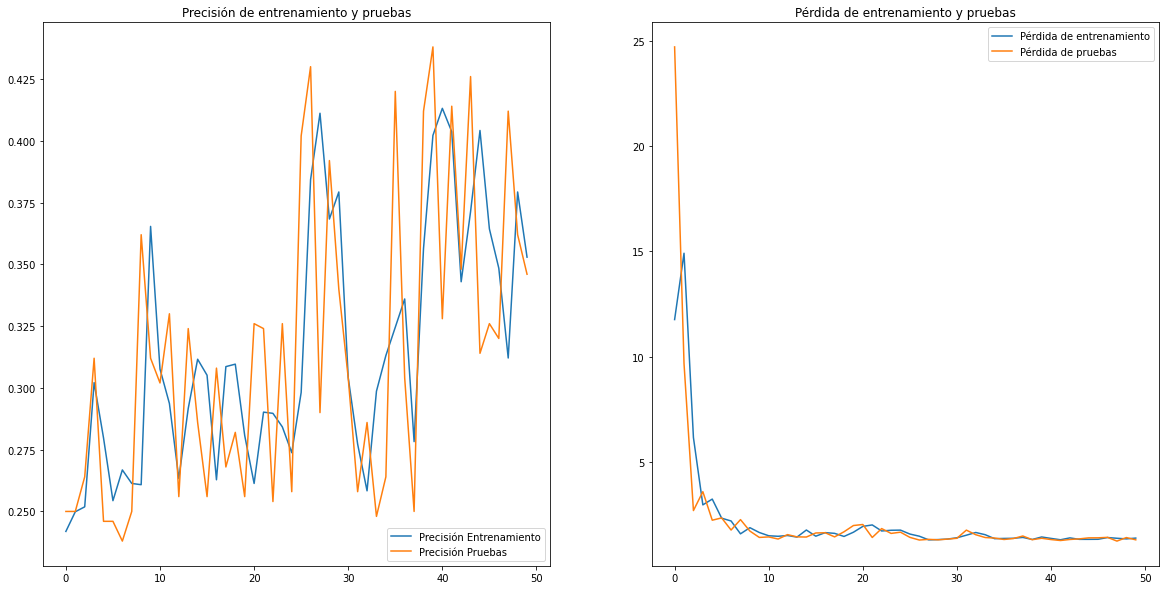

In [188]:
#Graficas de precisión ultimo dataset
acc = historialuno.history['accuracy']
val_acc = historialuno.history['val_accuracy']

loss = historialuno.history['loss']
val_loss = historialuno.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

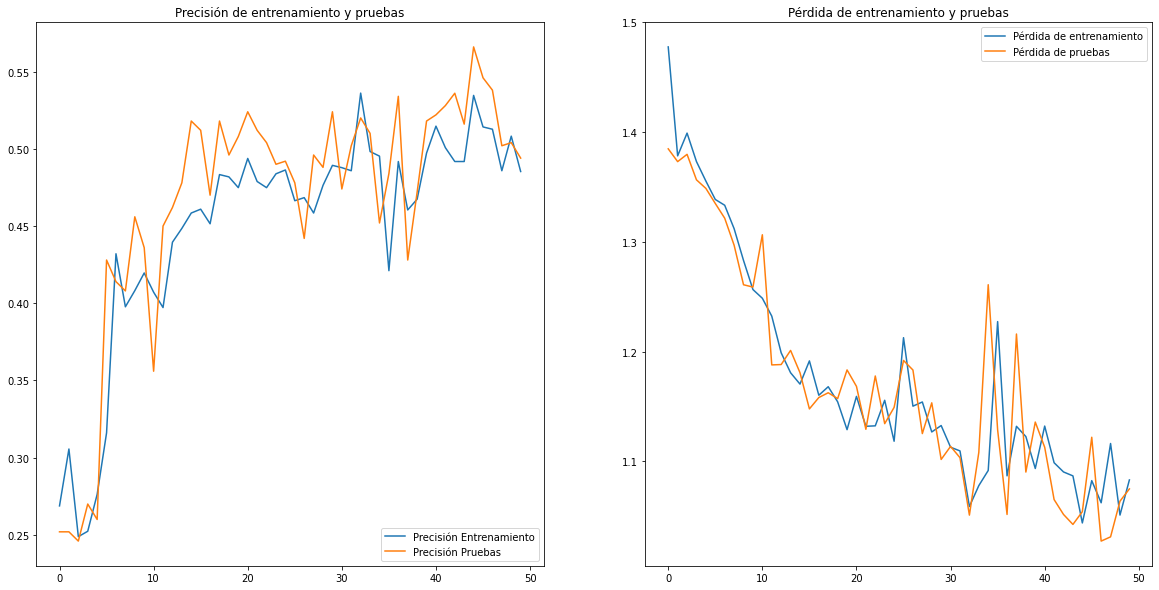

In [189]:
#Graficas de precisión ultimo dataset
acc = historialtres.history['accuracy']
val_acc = historialtres.history['val_accuracy']

loss = historialtres.history['loss']
val_loss = historialtres.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

# **FUNCIÓN PARA CATEGORIZAR - VALIDAR**

In [153]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  TAMANO_IMG = 100

  imagen = cv2.imread(url, 1)
  imagen = cv2.resize(imagen, (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1) #Cambiar tamano a 100,100,1

  # respuesta = requests.get(url)
  # img = Image.open(BytesIO(respuesta.content))
  # img = np.array(img).astype(float)/255
  # img = cv2.resize(img, (224,224))
  # prediccion1 = modelo_smx.predict(img.reshape(-1, 224, 224, 3))
  # prediccion2 = modelo_rl.predict(img.reshape(-1, 224, 224, 3))

  prediccion1 = integradoruno.predict(imagen.reshape(-1, 100, 100, 1))
  prediccion2 = integradortres.predict(imagen.reshape(-1, 100, 100, 1))
  return np.argmax([prediccion1[0], prediccion2[0]], axis=-1)

In [154]:
#0 = auto, 1 = bicicleta, 2 = camioneta, 3 = moto
url = '/content/bicicletas/2021122211323317183.jpg' #bici
prediccion = categorizar(url)
prediccion


array([1, 1])

# **EXPORTACIÓN DEL MODELO**

In [190]:
integradoruno.save('integradoruno.h5')

In [191]:
integradortres.save('integradortres.h5')

In [ ]:
!pip install tensorflowjs

In [193]:
!mkdir carpeta_salida
!mkdir carpeta_salida_dos

In [194]:
!tensorflowjs_converter --input_format keras integradoruno.h5 carpeta_salida

In [195]:
!tensorflowjs_converter --input_format keras integradortres.h5 carpeta_salida_dos

In [164]:
!rm -rf /content/autos
!rm -rf /content/bicicletas
!rm -rf /content/camionetas
!rm -rf /content/motos
!rm -rf /content/carpeta_salida
!rm -rf /content/carpeta_salida_dos
!rm -rf /content/dataset
!rm -rf /content/datasetp
!rm -rf /content/logs